In [1]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import math

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#Q1 plot 1 sample image for each class

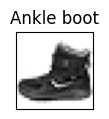

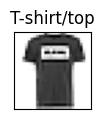

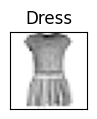

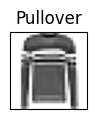

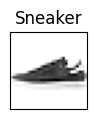

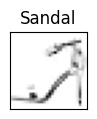

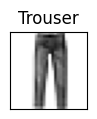

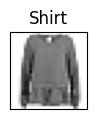

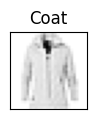

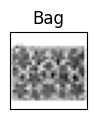

In [3]:
label={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print_Once=[1]*10;
count=10
for i in range(60000):
  if(count==0):
    break
  if(print_Once[y_train[i]]):
    print_Once[y_train[i]]-=1;
    count-=1;
    plt.figure(figsize=(1, 1))
    plt.imshow(x_train[i], cmap="Greys")
    plt.title("{}".format(label[y_train[i]]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

#Q2 feedforward neural network which takes image

In [4]:
def makeW(theta,currLayerNeuron,prevLayerNeuron,layerNo):
  w=[[0] * prevLayerNeuron for _ in range(currLayerNeuron)]
  for i in range(currLayerNeuron):
    for j in range(prevLayerNeuron):
      w[i][j]=random.random()
  theta[layerNo]=w

def makeB(theta,currLayerNeuron,layerNo):
  b=[]
  for i in range(currLayerNeuron):
      b.append(random.random())
  theta[layerNo]=b

In [8]:
noOfHiddenLayers=int(input("Enter No of Hidden Layer:- "))
theta=[]
classes=10
prevLayerNeuron=784
for i in range(2*(noOfHiddenLayers+1)):
  theta.append([])
for i in range(noOfHiddenLayers):
  neuronsInlayer=int(input(f"no of neurons in layer {i}:-"))
  makeW(theta,neuronsInlayer,prevLayerNeuron,i)
  makeB(theta,neuronsInlayer,noOfHiddenLayers+1+i)
  prevLayerNeuron=neuronsInlayer
makeW(theta,classes,prevLayerNeuron,noOfHiddenLayers)
makeB(theta,classes,2*(noOfHiddenLayers+1)-1)


Enter No of Hidden Layer:- 2
no of neurons in layer 0:-4
no of neurons in layer 1:-3


In [12]:
def calcA(W,B,h):
  a=[]
  Wh=[]
  for i in range(len(W)):
    sum=0
    for j in range(len(W[0])):
      sum+=W[i][j]*h[j]
    Wh.append(sum)
  for i in range(len(Wh)):
    a.append(B[i]+Wh[i])
  return a

def calcH(a):
  h=[]
  e=math.e
  for i in range(len(a)):
    h.append(1.0/(1+pow(e,-(a[i]))))
  return h


def calcY_hat(a):
  y_hat=[]
  e=math.e
  sumE=0
  for i in range(len(a)):
    sumE+=pow(e,a[i])
  for i in range(len(a)):
    y_hat.append(pow(e,a[i])/sumE)
  return y_hat

In [13]:
def forward_propagation(theta,inpList,a_h_list):
  h=inpList
  for i in range(noOfHiddenLayers):
    a=calcA(theta[i],theta[noOfHiddenLayers+1+i],h)
    a_h_list.append(a)
    h=calcH(a)
    a_h_list.append(h)
  a=calcA(theta[noOfHiddenLayers],theta[-1],h)
  a_h_list.append(a)
  y_hat=calcY_hat(a)
  a_h_list.append(y_hat)

In [14]:
a_h_list=[]
forward_propagation(theta,x_train[0].flatten(),a_h_list)
len(a_h_list)

6

In [25]:
#Print probability distribution over the 10 classes
a_h_list[-1]

[0.0588487313722216,
 0.17069804002679734,
 0.08742642973005173,
 0.07285249436697262,
 0.04319771100311231,
 0.11399173362363821,
 0.2049348460489327,
 0.05657086520381439,
 0.05962495757531049,
 0.13185419104914864]

In [17]:
sum(a_h_list[-1])

1.0